# Introduction

This Jupyter notebook provides a script to generate the figures for the manuscript and export them as PDF files. To use this script, please follow these steps:

1. Place all the necessary data files in a specified folder.
2. Update the folder path in the script to point to this data folder.
3. Run the script.

The script will process the data and create the figures in a chronological order, as outlined in the manuscript. Each figure will be saved as a separate PDF file in the specified output directory.

In [2]:
# definitions

from scipy.io import loadmat, savemat
import numpy as np
import os

#Graphics definitions
import matplotlib.pylab as plt
import matplotlib as mpl

#for this paper colors (unofficially)
blue = '#1f78b4'
green = '#66c2a5'
orange = '#fc8d62'

# Set the tick parameters for all axes
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5

# Set the font family and font size for labels
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 10
# Enable LaTeX rendering of text
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

#cm to inches convertion
cm = 0.39

In [9]:
#USER INPUT: where is the data collected?
folder = r'C:\Users\Philip Schmidt\Documents\Manuscripts\Colossus\Data4Repository'

os.chdir(folder)

data_list = []
for file in os.listdir(folder):
    if file.endswith(".mat"):
        data_list.append(file)

for i in range(len(data_list)):
    print("Select data_list[import index] = {} for the data of {}".format(i, data_list[i][:-4]))

Select data_list[import index] = 0 for the data of Fig10
Select data_list[import index] = 1 for the data of Fig1bc
Select data_list[import index] = 2 for the data of Fig1d
Select data_list[import index] = 3 for the data of Fig1e
Select data_list[import index] = 4 for the data of Fig2
Select data_list[import index] = 5 for the data of Fig3
Select data_list[import index] = 6 for the data of Fig4
Select data_list[import index] = 7 for the data of Fig6a
Select data_list[import index] = 8 for the data of Fig6b
Select data_list[import index] = 9 for the data of Fig7
Select data_list[import index] = 10 for the data of Fig9
Select data_list[import index] = 11 for the data of FigDarkNoise


# Fig 1bc

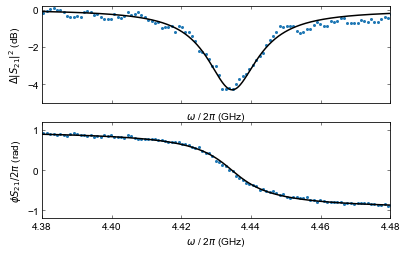

In [4]:
Fig1bc = loadmat(data_list[1])

#for header in Fig1bc:
#    print(header)

FreqTrans = Fig1bc["FreqdB (GHz)"][0]
S21dB = Fig1bc["S21 (dB)"][0]
FreqFitTrans = Fig1bc["FreqFitTrans (GHz)"][0]
TransFit = Fig1bc["TransFit (dB)"][0]

FreqPhase = Fig1bc["FreqPhase (GHz)"][0]
PhaseData = Fig1bc["Phase"][0]
FreqFitPhase = Fig1bc["FreqFitPhase"][0]
PhaseFit = Fig1bc["PhaseFit"][0]

# Set the figure size to 8 x 5 cm, factor 2 for enhancement
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(2*8*cm, 2*5*cm))

ax1.set_xlabel('$\omega$ / 2$\pi$ (GHz)')
ax1.set_ylabel('$\Delta |S_{21}|^2$ (dB)')
ax1.set_xlim(4.38, 4.48)
ax1.set_ylim(-5, 0.2)
ax1.set_xticklabels([])
ax1.plot(FreqTrans, S21dB, blue, markersize = 2, marker = "o", linestyle = '')
ax1.plot(FreqFitTrans, TransFit, 'k', markersize = 0.1, marker = "", linestyle = '-')


ax2.set_xlabel('$\omega$ / 2$\pi$ (GHz)')
ax2.set_ylabel('$\phi S_{21} / 2\pi$ (rad)')
ax2.set_xlim(4.38, 4.48)
ax2.set_ylim(-1.2, 1.2)
ax2.plot(FreqPhase, PhaseData, blue, markersize = 2, marker = "o", linestyle = '')
ax2.plot(FreqFitPhase, PhaseFit, 'k', markersize = 0.1, marker = "", linestyle = '-')

#save figure as pdf
#plt.savefig('Fig1bc.pdf', bbox_inches='tight')

# Fig 1d

Text(0, 0.5, '$\\omega$ / 2$\\pi$ (GHz)')

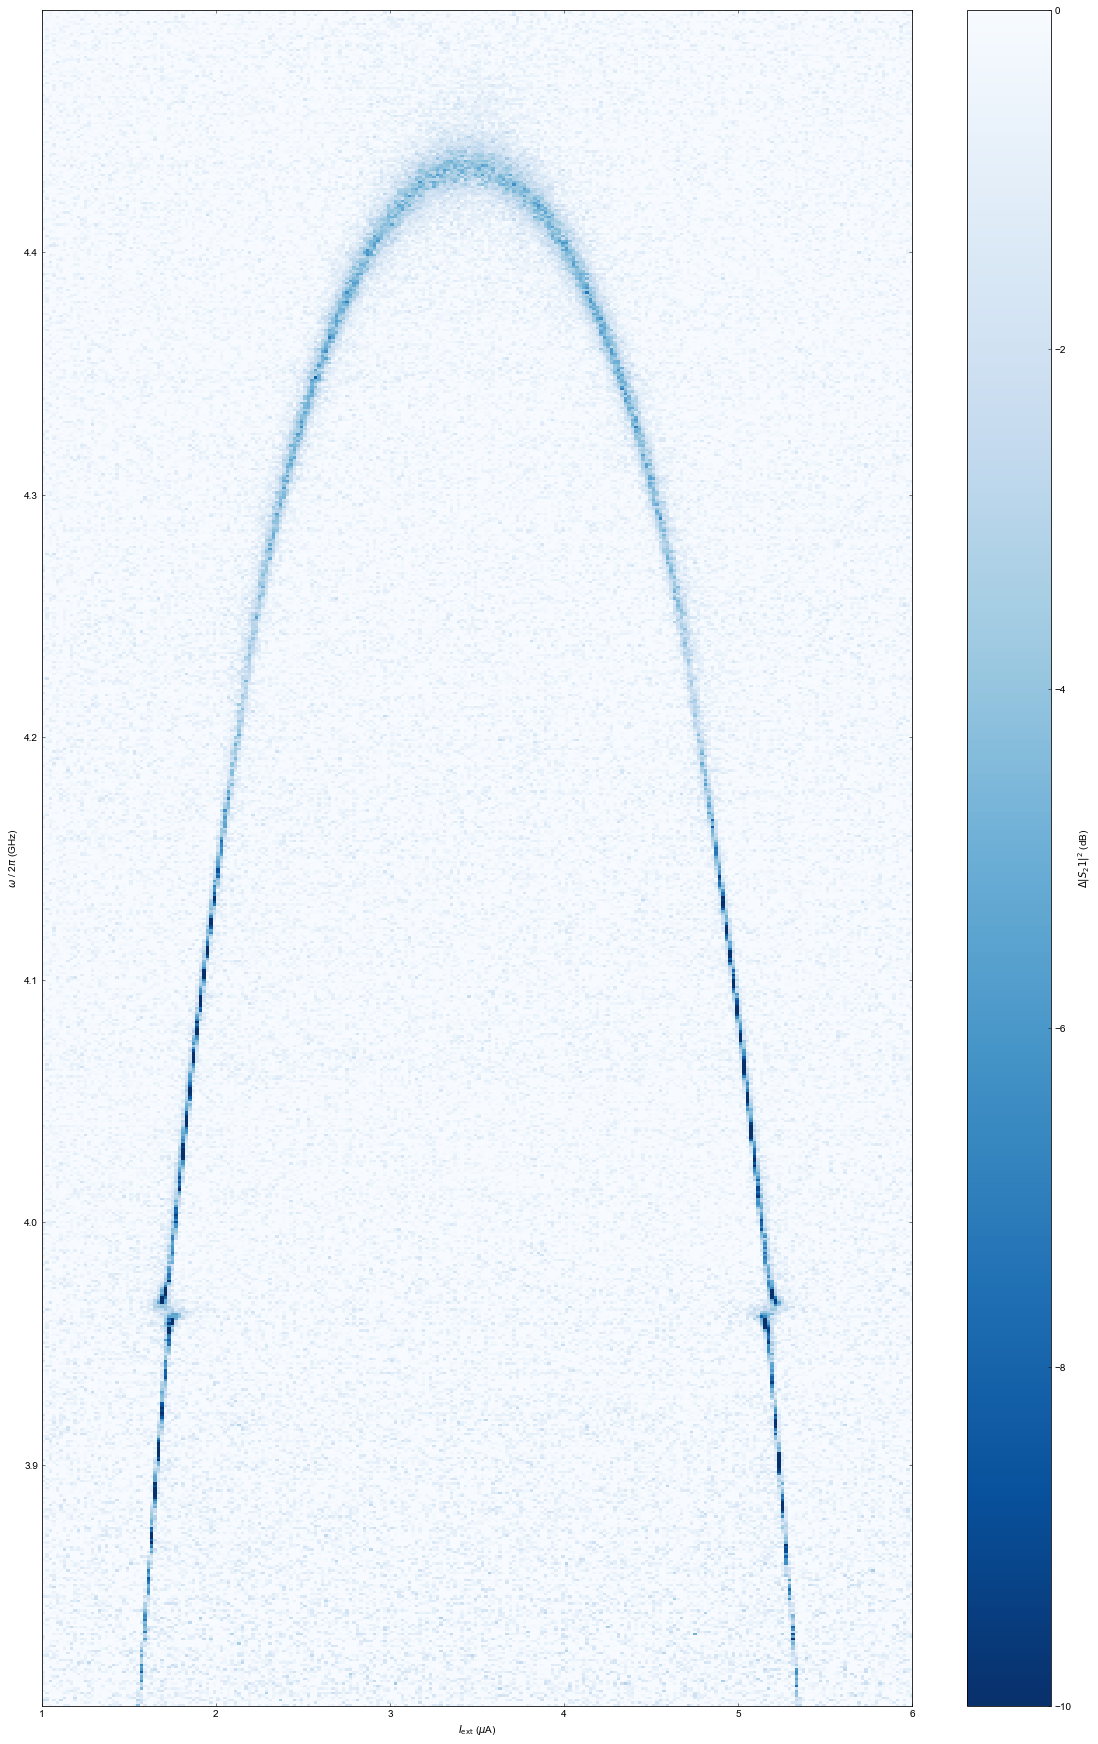

In [6]:
Fig1d = loadmat(data_list[2])

#for header in Fig1d:
#    print(header)
    
S21dB = Fig1d["S21dB"]
Iext = Fig1d["Iext (muA)"]
Freq = Fig1d["Freq (GHz)"]

# Set the figure size to 8 x 5 cm (here x10 for to enhance the data)
fig, ax = plt.subplots(figsize=(50*cm, 80*cm))
colormap = 'Blues'
#invert the color bar to highlight the structure against a white background
colormap = "{}{}".format(colormap, "_r")

im = ax.imshow(S21dB, extent=[Iext[0, 0], Iext[0, 1], Freq[0, 0], Freq[0, 1]], cmap=colormap, aspect = 'auto')
cbar = plt.colorbar(im) 
im.set_clim(-10,0)
cbar.set_label('$\Delta |S_21|^2$ (dB)')
ax.set_xlabel('$I_{\mathrm{ext}}$ ($\mu$A)')
ax.set_ylabel('$\omega$ / 2$\pi$ (GHz)')

#save figure as pdf
#plt.savefig('Fig1d.pdf', bbox_inches='tight')

# Fig 1e

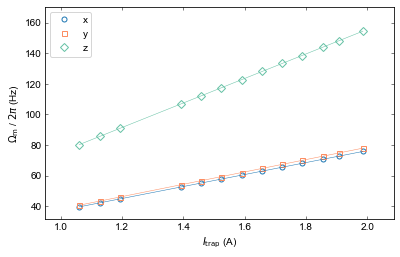

In [8]:
Fig1e = loadmat(data_list[3])

#for header in Fig1e:
#    print(header)
    
CoilCurrent = Fig1e["Coil current (A)"][0]
CurrentFit =  Fig1e["Fitcurrent"][0]

x_freq =  Fig1e["omegax /2pi (Hz)"][0]
y_freq =  Fig1e["omegay /2pi (Hz)"][0]
z_freq =  Fig1e["omegaz /2pi (Hz)"][0]

xfreqfit = Fig1e["xfreqfit"][0]
yfreqfit = Fig1e["yfreqfit"][0]
zfreqfit = Fig1e["zfreqfit"][0]


# Set the figure size to be large
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.set_xlabel(r'$I_{\mathrm{trap}}$ (A)')#for poster: , fontsize=30)
ax.set_ylabel(r'$\Omega_\mathrm{m}$ / $2\pi$ (Hz)')#for poster: , fontsize=30)

ax.set_xlim(0.95, np.max(CoilCurrent)*1.05)
ax.set_ylim(np.min(x_freq)*0.8, np.max(z_freq)*1.1) 

ax.plot(CoilCurrent, x_freq, blue, markersize = 5, linestyle = '', marker = "o", mfc="none", label = 'x');
ax.plot(CoilCurrent, y_freq, orange, markersize = 5, linestyle = '', marker = "s", mfc="none", label = 'y');
ax.plot(CoilCurrent, z_freq, green, markersize = 5, linestyle = '', marker = "D", mfc="none", label = 'z');
ax.plot(CurrentFit, xfreqfit, blue, markersize = 1, linestyle = '-', marker = "", linewidth=0.5);
ax.plot(CurrentFit, yfreqfit, orange, markersize = 1, linestyle = '-', marker = "", linewidth=0.5);
ax.plot(CurrentFit, zfreqfit, green, markersize = 1, linestyle = '-', marker = "", linewidth=0.5);
ax.legend(loc = "upper left")

#save figure as pdf
#plt.savefig('Fig1e.pdf', bbox_inches='tight')

# Fig 2

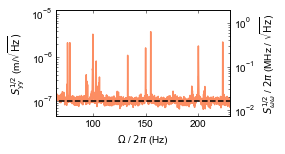

In [12]:
Fig2_data = loadmat(data_list[4])

#for header in Fig2_data:
#    print(header)

S_xx_to_plot = Fig2_data["Syy"][0]
FFT_freqs = Fig2_data["FFT_Freqs"][0]

fig, ax = plt.subplots(figsize=(8*cm, 5*cm))
ax.set_xlabel(r'$\Omega$ / $2\pi$ (Hz)')#, fontsize=30)
ax.set_ylabel(r'$S_{\mathrm{yy}}^{1/2}$ (m/$\sqrt{\mathrm{Hz}})$')#, fontsize=30)
ax.set_xlim(65,230)


ax.semilogy(FFT_freqs, np.sqrt(S_xx_to_plot), orange, markersize = 1, label = '1')
ax.semilogy([60, 250], [np.sqrt(np.mean(S_xx_to_plot[-150:-50])), np.sqrt(np.mean(S_xx_to_plot[-150:-50]))], 'k', linestyle = '--')

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylabel(r'$S_{\omega\omega}^{1/2}$ / $2\pi$ (MHz / $\sqrt{\mathrm{Hz}}$)')
ax2.set_ylim(ax.get_ylim()[0]*161211, ax.get_ylim()[1]*161211)
ax2.tick_params(axis='both', which='major')

#save figure as pdf
#plt.savefig('Fig2.pdf', bbox_inches='tight') 

# Fig 3

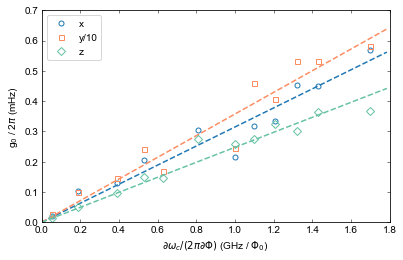

In [14]:
Fig3 = loadmat(data_list[5])

#for header in Fig3:
#    print(header)
    
Slopex = Fig3["Slope in x (GHz/Phi0)"][0]
Slopey = Fig3["Slope in y (GHz/Phi0)"][0]
Slopez = Fig3["Slope in z (GHz/Phi0)"][0]

g0x = Fig3["g0_x/2pi (mHz)"][0]
g0y = Fig3["g0_y/2pi/10 (mHz/10)"][0]
g0z = Fig3["g0_z/2pi (mHz)"][0]

SlopeFit = Fig3["Slope for fit"][0]

g0xFit = Fig3["g0_xfit"][0]
g0yFit = Fig3["g0_yfit/10"][0]
g0zFit = Fig3["g0_zfit"][0]


# Set the figure size to 8 x 5 cm, factor 2 for enhancement
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

plt.plot(Slopex, g0x,  blue,  markersize = 5, linestyle = '', marker = "o", mfc="none", label = 'x');
plt.plot(SlopeFit, g0xFit, blue, linestyle="dashed")

plt.plot(Slopey, g0y, orange,  markersize = 5, linestyle = '', marker = "s", mfc="none", label = 'y/10');
plt.plot(SlopeFit, g0yFit, orange, linestyle="dashed")

plt.plot(Slopez, g0z, green,  markersize = 5, linestyle = '', marker = "D", mfc="none", label = 'z');
plt.plot(SlopeFit, g0zFit, green, linestyle="dashed")

plt.ylim(0, 0.7)
plt.xlim(0, 1.8)

plt.xlabel("$\partial \omega_{c} / (2\pi \partial \Phi)$ (GHz / $\Phi_0$)")
plt.ylabel(r"g$_0$ / 2$\pi$ (mHz)")

plt.legend()

#save figure as pdf
#plt.savefig('Fig3.pdf', bbox_inches='tight')

# Fig 4 + 11 (zoom)

In [15]:
Fig4 = loadmat(data_list[6])

#for header in Fig4:
#    print(header)
    
Gmechx = Fig4["Gmechx"][0]
Gmechy = Fig4["Gmechy"][0]
Gmechz = Fig4["Gmechz"][0]

Simpx = Fig4["Simpx"][0]
Simpy = Fig4["Simpy"][0]
Simpz = Fig4["Simpz"][0]

Gfitcurve = Fig4["xfit"][0]
SimpFit = Fig4["SimpFit"][0]

Gtheorycurve = Fig4["G theorycurves"][0]

SimpQM = Fig4["SimpQMlimit"][0]
SimpQAmp = Fig4["Simp with Q-amp"][0]
SxxThermal = Fig4["Sxxthermal"][0]
SBAThermal = Fig4["S backaction (thermal)"][0]
SGS =  Fig4["Sxx in ground state"][0]
SBAGS = Fig4["S backaction (in GS)"][0]
SimpFitextend = Fig4["SimpFit extension"][0]

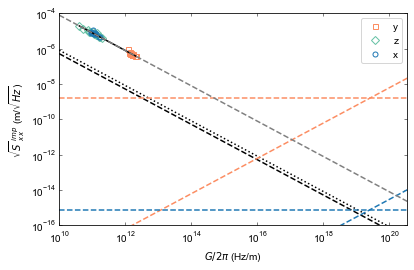

In [17]:
#Figure 4

# Set the figure size to be large
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.set_xlabel('$G / 2\pi$ (Hz/m)')
ax.set_ylabel(r'$\sqrt{S}$ $_{xx}^{imp}$ (m/$\sqrt{Hz}$)')

ax.set_xlim(1e10, 3.5*1e20)
ax.set_ylim(1e-16, 1e-4)

ax.loglog(Gmechy, Simpy, orange, markersize = 5, marker = "s", mfc='none', linestyle = "", label = 'y');
ax.loglog(Gmechz, Simpz, green, markersize = 5, marker = "D", mfc="none", linestyle = "", label = 'z');
ax.loglog(Gmechx, Simpx, blue, markersize = 5, marker = "o", mfc='none', linestyle = "", label = 'x');

ax.loglog(Gfitcurve, SimpFit, color = 'k', markersize = 10, marker = "", linestyle = "-");

ax.loglog(Gtheorycurve, SimpQM, color = 'k', markersize = 10, marker = "", linestyle = "--");
ax.loglog(Gtheorycurve, SimpQAmp, color = 'k', markersize = 10, marker = "", linestyle = ":");

ax.loglog(Gtheorycurve, SxxThermal, color = orange, markersize = 10, marker = "", linestyle = "--");
ax.loglog(Gtheorycurve, SBAThermal, color = orange, markersize = 10, marker = "", linestyle = "--");

ax.loglog(Gtheorycurve, SGS, color = blue, markersize = 10, marker = "", linestyle = "--");
ax.loglog(Gtheorycurve, SBAGS, color = blue, markersize = 10, marker = "", linestyle = "--");

ax.loglog(Gtheorycurve, SimpFitextend, color = 'grey', markersize = 10, marker = "", linestyle = "--");

ax.legend(loc = "upper right")

#save figure as pdf
#plt.savefig('Fig4.pdf', bbox_inches='tight')

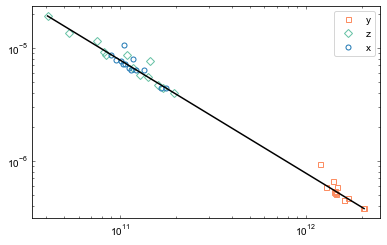

In [19]:
#Figure 11

fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.loglog(Gmechy, Simpy, orange, markersize = 5, marker = "s", mfc='none', linestyle = "", label = 'y');
ax.loglog(Gmechz, Simpz, green, markersize = 5, marker = "D", mfc="none", linestyle = "", label = 'z');
ax.loglog(Gmechx, Simpx, blue, markersize = 5, marker = "o", mfc='none', linestyle = "", label = 'x');

ax.loglog(Gfitcurve, SimpFit, color = 'k', markersize = 10, marker = "", linestyle = "-");
ax.legend(loc = "upper right")

#save figure as pdf
#plt.savefig('Fig11.pdf', bbox_inches='tight')

# Fig 6a

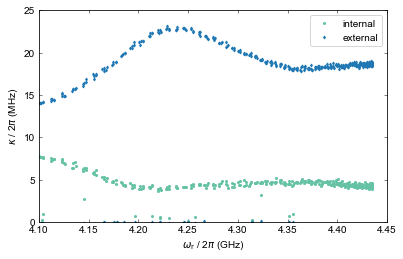

In [21]:
Fig6a = loadmat(data_list[7])

#for header in Fig6b:
#    print(header)
    
Freq = Fig6a["Freq (GHz)"][0]
KappaInt = Fig6a["KappaInt (MHz)"][0]
KappaExt = Fig6a["KappaExt (MHz)"][0]

# Set the figure size to 8 x 5 cm
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.set_xlabel('$\omega_{\mathrm{r}}$ / 2$\pi$ (GHz)')
ax.set_ylabel('$\kappa$ / 2$\pi$ (MHz)')
ax.set_xlim(4.1, 4.45)
ax.set_ylim(0, 25)
ax.plot(Freq, KappaInt, green, markersize = 2, marker = "o", linestyle = '', label = "internal")
ax.plot(Freq, KappaExt, blue, markersize = 2, marker = "d", linestyle = '', label = "external")
ax.legend()

#save figure as pdf
#plt.savefig('Fig6a.pdf', bbox_inches='tight')

# Fig 6b

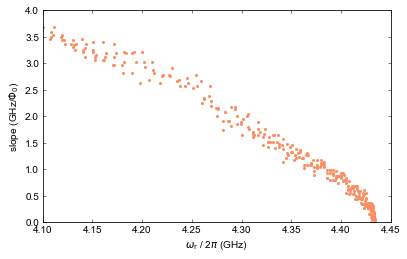

In [23]:
Fig6b = loadmat(data_list[8])

#for header in Fig6b:
#    print(header)
    
Freq = Fig6b["Freq (GHz)"][0]
Slope = Fig6b["Slope"][0]

# Set the figure size to 8 x 5 cm
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.set_xlabel('$\omega_{\mathrm{r}}$ / 2$\pi$ (GHz)')
ax.set_ylabel('slope (GHz/$\Phi_0$)')
ax.set_xlim(4.1,4.45)
ax.set_ylim(0,4)
ax.plot(Freq, Slope, orange, markersize = 2, marker = "o", linestyle = "");

#save figure as pdf
#plt.savefig('Fig6b.pdf', bbox_inches='tight')

# Fig 7

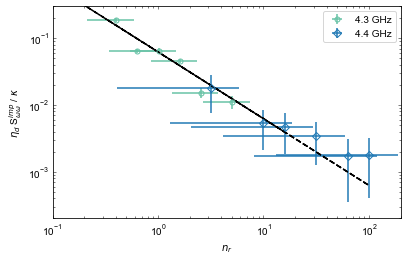

In [25]:
Fig7 = loadmat(data_list[9])

#for header in Fig7:
#    print(header)

x_pts_4p3 = Fig7["x_pts_4p3"][0]
y_pts_4p3 = Fig7["y_pts_4p3"][0]
x_err_4p3 = Fig7["x_err_4p3"][0]
y_err_4p3 = Fig7["y_err_4p3"][0]

x_pts_4p4 = Fig7["x_pts_4p4"][0]
y_pts_4p4 = Fig7["y_pts_4p4"][0]
x_err_4p4 = Fig7["x_err_4p4"][0]
y_err_4p4 = Fig7["y_err_4p4"][0]

x_fit = Fig7["x_fit"][0]
y_fit = Fig7["y_fit"][0]

# Set the figure size to 8 x 5 cm
fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))

ax.set_xlabel(r"$n_{r}$")
ax.set_ylabel(r"$\eta_d$ S$_{\omega \omega}^{imp}$ / $\kappa$")

ax.set_xlim((1e-1, 2e2))
ax.set_ylim((2e-4, 3e-1))

#asymmetric x-errorbars
ax.errorbar(x_pts_4p3, y_pts_4p3, xerr=x_err_4p3, yerr=y_err_4p3, color=green, markersize=5, marker="o", linestyle="",  mfc="none", label="4.3 GHz")
ax.errorbar(x_pts_4p4, y_pts_4p4, xerr=x_err_4p4, yerr=y_err_4p4, color=blue, markersize=5, marker="D", linestyle="",  mfc="none", label="4.4 GHz")
ax.plot(x_fit, y_fit, linestyle="dashed", color="black")

ax.legend(loc="upper right")

ax.set_xscale("log")
ax.set_yscale("log")

#save figure as pdf
#plt.savefig('Fig7.pdf', bbox_inches='tight')

# Fig 9

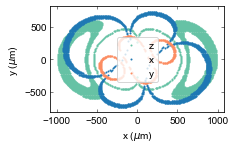

In [29]:
Fig9_data = loadmat(data_list[10])

#for header in Fig9_data:
#    print(header)

X_pos_x = Fig9_data['X_pos_x'][0]
X_pos_y = Fig9_data['X_pos_y'][0]
X_pos_z = Fig9_data['X_pos_z'][0]
Y_pos_x = Fig9_data['Y_pos_x'][0]
Y_pos_y = Fig9_data['Y_pos_y'][0]
Y_pos_z = Fig9_data['Y_pos_z'][0]

fig, ax = plt.subplots(figsize=(8*cm, 5*cm))
ax.set_xlabel(r"x ($\mu$m)")
ax.set_ylabel(r"y ($\mu$m)")

ax.scatter(X_pos_z, Y_pos_z, s=1, color=green, label="z")
ax.scatter(X_pos_x, Y_pos_x, s=1, color=blue, label="x")
ax.scatter(X_pos_y, Y_pos_y, s=1, color=orange, label="y")

ax.legend()

#save figure as pdf
#plt.savefig('Fig9.pdf', bbox_inches='tight')

# Fig 10

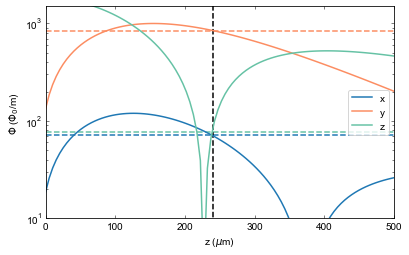

In [39]:
Fig10_data = loadmat(data_list[0])

#for header in Fig10_data:
#    print(header)

Z_xdata = Fig10_data["Z_xdata"][0]
x_sens_pos = Fig10_data["x_sens_pos"][0]
y_sens_pos = Fig10_data["y_sens_pos"][0]
z_sens_pos = Fig10_data["z_sens_pos"][0]

#Estimated position of PUL relative to particle in um
X_pos = -432.22
Y_pos = -233.9
Z_pos = 240
bz_slope = 83 #T/m, magnetic field gradient from coupling vs. slope measurements
a_tech_est = 6 * 8.5 #estimated a_tech
mu_0 = 4*np.pi*1e-7
particle_density = 10.9e3 #particle density (lead-tin)
hbar = 1.054*1e-34
m_eff = 5.7e-9
omega_slope = 2*np.pi * np.sqrt(3/(8 * np.pi**2 * mu_0 * particle_density)) * bz_slope #angular frequency of z-mode for slope measurements
zpf_slope = np.sqrt(hbar/(2 * m_eff * omega_slope))
y_zpf_ratio = np.sqrt(48.14245463139384/24.21378963321694)
x_zpf_ratio = np.sqrt(48.14245463139384/23.50947419329888)


fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))
ax.set_xlabel(r"z ($\mu$m)")
ax.set_ylabel(r"$\Phi$ ($\Phi_0$/m)")

ax.plot(Z_xdata, x_sens_pos, blue, label="x")
ax.plot(Z_xdata, y_sens_pos, orange, label="y")
ax.plot(Z_xdata, z_sens_pos, green, label="z")

ax.set_xlim(0,500)
#ax.set_xlim(180,300)
plt.yscale("log")
ax.set_ylim(10,1500)

#the tarrget sensitivities
#no outliers:
# sx_target = 67.97
# sy_target = 782.92
# sz_target = 76.33
sx_target = 71
sy_target = 835
sz_target = 76
ax.hlines(sx_target, 0, 500, blue, linestyle="dashed")
ax.hlines(sy_target, 0, 500, orange, linestyle="dashed")
ax.hlines(sz_target, 0, 500, green, linestyle="dashed")
ax.vlines(Z_pos , 0, 2000, "black", linestyle = "dashed")

# plt.hlines(70.3, 0, 500, color="blue", linestyle="dashed")
# plt.hlines(828.05, 0, 500, color="red", linestyle="dashed")
# plt.hlines(75.5, 0, 500, color="green", linestyle="dashed")


ax.legend()

#save figure as pdf
#plt.savefig('Fig10.pdf', bbox_inches='tight')

# Fig DarkNoise

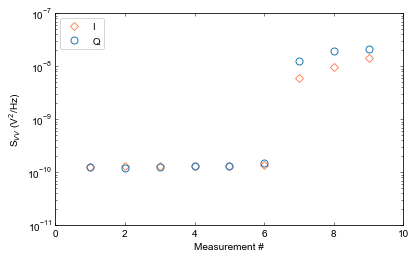

In [41]:
FigDarkNoise = loadmat(data_list[-1])

#for header in FigDarkNoise:
#    print(header)
    
MeasNr = FigDarkNoise["Meas. Nr."][0]
Ch1 = FigDarkNoise["Ch1 (V^2/Hz)"][0]
Ch2 = FigDarkNoise["Ch2 (V^2/Hz)"][0]

fig, ax = plt.subplots(figsize=(2*8*cm, 2*5*cm))
#factor 2 for enhancement. In paper: 8x8cm

ax.set_xlabel('Measurement #')
ax.set_ylabel('S$_{VV}$ (V$^2$/Hz)')

ax.set_ylim(1e-11, 1e-7)
ax.set_xlim(0, 10)

#plt.axvline(x = 5.5, color = 'k', linestyle = '--', label = 'new range')
#plt.axvline(x = 11.5, color = 'k', linestyle = '-', label = 'dark noise')
ax.semilogy(MeasNr, Ch1, orange, markersize = 5, linestyle = '', marker = "D", mfc="none", label = 'I');
ax.semilogy(MeasNr, Ch2, blue, markersize = 7, linestyle = '', marker = "o", mfc="none", label = 'Q');
ax.legend()

#save figure as pdf
#plt.savefig('FigDarkNoise.pdf', bbox_inches='tight')